In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
import torchvision.transforms.functional as F

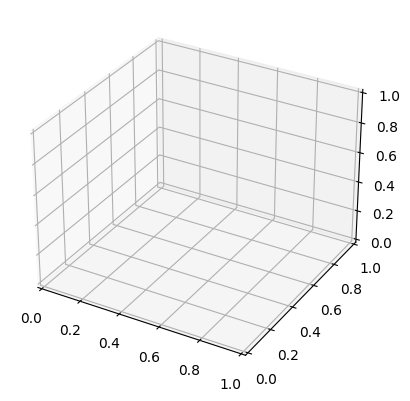

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5, 0.92, '10x**2 + y**2')

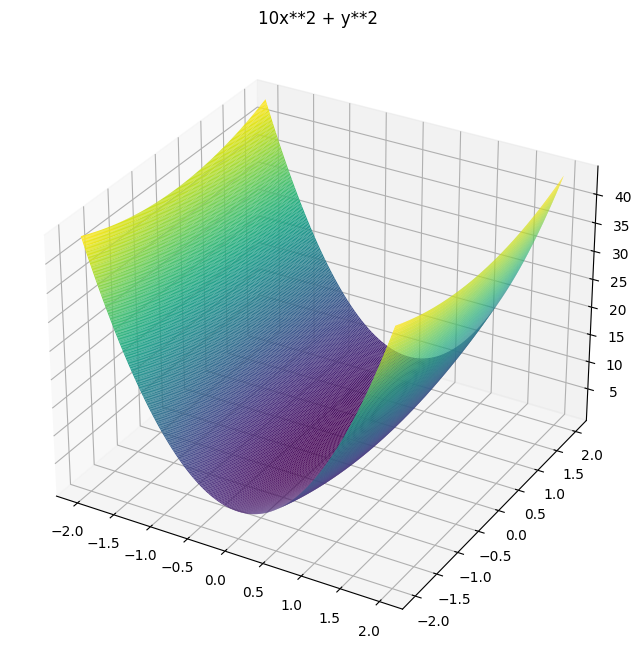

In [3]:
f = lambda x,y : 10*x**2 + y**2
x = torch.linspace(-2, 2, 200)
y = torch.linspace(-2, 2, 200)
X, Y = torch.meshgrid(x, y,indexing='xy')
Z = f(X,Y)
fig = plt.figure(1,figsize = (8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('10x**2 + y**2')

In [4]:
#--------all function all written here---------
# funtion = 10*x**2 + y**2
# gradient wrt x = 20*x
# gradient wrt y = 2*y
def vanilla_grad(x,y):
    grad = torch.zeros(2)
    grad[0] = 20*x
    grad[1] = 2*y
    return grad

def momentum_grad(x,y,v,a):
    grad = torch.zeros(2)
    grad[0] = 20*x
    grad[1] = 2*y
    v = a*v + grad
    return v

def nesterov_grad(x,y,v,a):
    grad = torch.zeros(2)
    grad[0] = 20*(x+a*v[0])
    grad[1] = 2*(y+a*v[1])
    v = a*v + grad
    return v

def ada_grad(x,y,grad_sq):
    grad = torch.zeros(2)
    grad[0] = 20*x
    grad[1] = 2*y
    grad_sq = grad_sq + grad[0]*grad[0]+grad[1]*grad[1]
    return grad,grad_sq

def rms_prop_grad(x,y,grad_sq,a):
    grad = torch.zeros(2)
    grad[0] = 20*x
    grad[1] = 2*y
    grad_sq = a*grad_sq + (1-a)*(grad[0]*grad[0]+grad[1]*grad[1])
    return grad,grad_sq

In [5]:
#---------vanilla sgd---------------------
torch.manual_seed(42)
point = (torch.rand(2)-0.5)*4
w_point = point
x1= [point[0]]
y1= [point[1]]
z1= [f(point[0],point[1])]
lr = 0.02 #learning factor
for i in range(50):
    grad = vanilla_grad(w_point[0],w_point[1])
    w_point = w_point - lr*grad
    x1.append(w_point[0])
    y1.append(w_point[1])
    z1.append(f(w_point[0],w_point[1]))
#------------------------------------------

#---------SGD+momentum---------------------
w_point = point
x2= [point[0]]
y2= [point[1]]
z2= [f(point[0],point[1])]
lr = 0.002 #learning factor
momentum = torch.zeros(2)
for i in range(50):
    momentum = momentum_grad(w_point[0],w_point[1],momentum,0.9) #friction = 0.9
    w_point = w_point - lr*momentum
    x2.append(w_point[0])
    y2.append(w_point[1])
    z2.append(f(w_point[0],w_point[1]))
#------------------------------------------
    
#---------SGD+nesterov momentum-------------
w_point = point
x3= [point[0]]
y3= [point[1]]
z3= [f(point[0],point[1])]
lr = 0.02 #learning factor
momentum = torch.zeros(2)
for i in range(100):
    momentum = nesterov_grad(w_point[0],w_point[1],momentum,0.01) #friction = 0.01
    w_point = w_point - lr*momentum
    x3.append(w_point[0])
    y3.append(w_point[1])
    z3.append(f(w_point[0],w_point[1]))
#--------------------------------------------

#----------adagrad-------------------------------------------
w_point = point
x4= [point[0]]
y4= [point[1]]
z4= [f(point[0],point[1])]
lr = 0.05 #learning factor
grad_sq = torch.tensor([0])
epsilon = 1e-7
for i in range(50):
    grad,grad_sq = ada_grad(w_point[0],w_point[1],grad_sq)
    w_point = w_point - lr*(grad/(torch.sqrt(grad_sq)+epsilon))
    x4.append(w_point[0])
    y4.append(w_point[1])
    z4.append(f(w_point[0],w_point[1]))
#---------------------------------------------------------------
    
#----------rms prop-----------------------------------------------
w_point = point
x5= [point[0]]
y5= [point[1]]
z5= [f(point[0],point[1])]
lr = 0.02 #learning factor
grad_sq = 0
epsilon = 1e-7
for i in range(50):
    grad,grad_sq = rms_prop_grad(w_point[0],w_point[1],grad_sq,0.9) #friction = 0.9
    w_point = w_point - lr*(grad/(torch.sqrt(grad_sq)+epsilon))
    x5.append(w_point[0])
    y5.append(w_point[1])
    z5.append(f(w_point[0],w_point[1]))
#-------------------------------------------------------------------

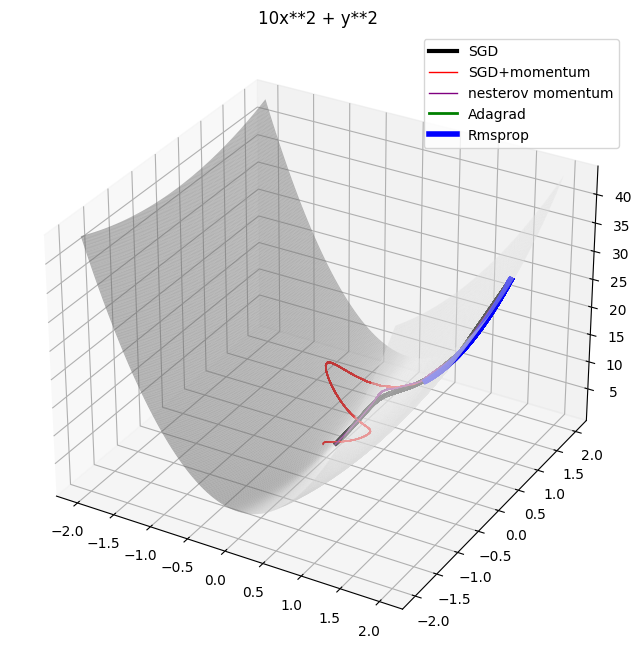

In [6]:
fig = plt.figure(1,figsize = (8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,color = 'w',alpha=0.5, edgecolor='none')
ax.set_title('10x**2 + y**2')
for j in range(len(x1)):
    plt.figure(1)
    ax.plot(x1[:j],y1[:j],z1[:j],lw = 3,color = 'black',label='SGD')
    ax.plot(x2[:j],y2[:j],z2[:j],lw = 1,color = 'red',label='SGD+momentum')
    ax.plot(x3[:j],y3[:j],z3[:j],lw = 1,color = 'purple',label='nesterov momentum')
    ax.plot(x4[:j],y4[:j],z4[:j],lw = 2,color = 'green',label='Adagrad')
    ax.plot(x5[:j],y5[:j],z5[:j],lw = 4,color = 'blue',label='Rmsprop')
    if(j==0):
        plt.legend()
    plt.savefig('./result_images/fig'+str(j+1)+'.png')

In [8]:
import os
import imageio

png_dir = '../git/dl-course-project'
images = []

for i in range(1,52):
    images.append(imageio.v2.imread('./result_images/fig'+str(i)+'.png'))

imageio.mimsave('../dl-course-project/GIF1.gif', images)

In [9]:
def f(x,y):
    return 10*(x)**2+y**2

def plotF():
    x = np.linspace(-2, 2, 500)
    y = np.linspace(-2, 2, 500)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    plt.contourf(X, Y, Z,alpha=0.6)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

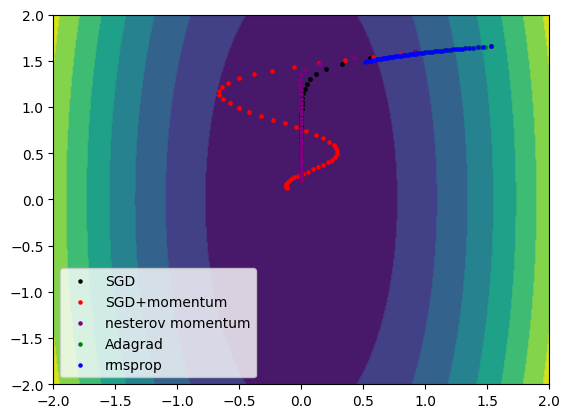

In [11]:
labels = ['SGD','SGD+momentum','nesterov momentum','Adagrad','rmsprop']
for j in range(len(x1)):
    plotF()
    plt.scatter(x1[:j],y1[:j],s = 5,color = 'black',label=labels[0])
    plt.scatter(x2[:j],y2[:j],s = 5,color = 'red',label=labels[1])
    plt.scatter(x3[:j],y3[:j],s = 5,color = 'purple',label=labels[2])
    plt.scatter(x4[:j],y4[:j],s = 5,color = 'green',label=labels[3])
    plt.scatter(x5[:j],y5[:j],s = 5,color = 'blue',label=labels[4])
    if(j==0):
        plt.legend()
    plt.savefig('./result_images/fig'+str(j+1)+'.png')

In [12]:
png_dir = '../git/dl-course-project'
images = []

for i in range(1,52):
    images.append(imageio.v2.imread('./result_images/fig'+str(i)+'.png'))

imageio.mimsave('../dl-course-project/GIF1.gif', images)